# Bank Marketing Prediction

## About Dataset

### Title: Bank Marketing (bank client data)

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

- The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [4]:
df=pd.read_csv('/content/bank-additional-full.csv',delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df['y']=df['y'].map({'yes':1,'no':0})

In [8]:
df.pdays[df.pdays==-1]=0

<ipython-input-8-c8fc8fb7e1c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pdays[df.pdays==-1]=0


## Different descriptive statistics -
- Measures of Frequency:- Count, Percent, Frequency.
- Measures of Central Tendency :- Mean, Median, and Mode.
- Measures of Dispersion or Variation:- Range(min,max),Variance, Standard Deviation.
- Measures of Position :- Percentile Ranks, Quartile Ranks.

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Checking for unique values in all attributes</p></h3> <a class="anchor" id="sec1.5"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan;padding:12px;border-radius: 8px">Different numbers of distint values in each attribute.our target varibale is y .</p>
</html>

In [10]:
df.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Checking for missing values in each column</p></h3> <a class="anchor" id="sec1.6"></a>

No such missing values in our dataset.

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">percentage of missing values in each column</p></h3> <a class="anchor" id="sec1.7"></a>

In [12]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

age              0.00 %
job              0.00 %
marital          0.00 %
education        0.00 %
default          0.00 %
housing          0.00 %
loan             0.00 %
contact          0.00 %
month            0.00 %
day_of_week      0.00 %
duration         0.00 %
campaign         0.00 %
pdays            0.00 %
previous         0.00 %
poutcome         0.00 %
emp.var.rate     0.00 %
cons.price.idx   0.00 %
cons.conf.idx    0.00 %
euribor3m        0.00 %
nr.employed      0.00 %
y                0.00 %
dtype: float64


## Data Visualization <a class="anchor" id="sec2"></a>

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Missing Value Plot</p></h3> <a class="anchor" id="sec2.1"></a>

In [13]:
import missingno as msno

<Axes: >

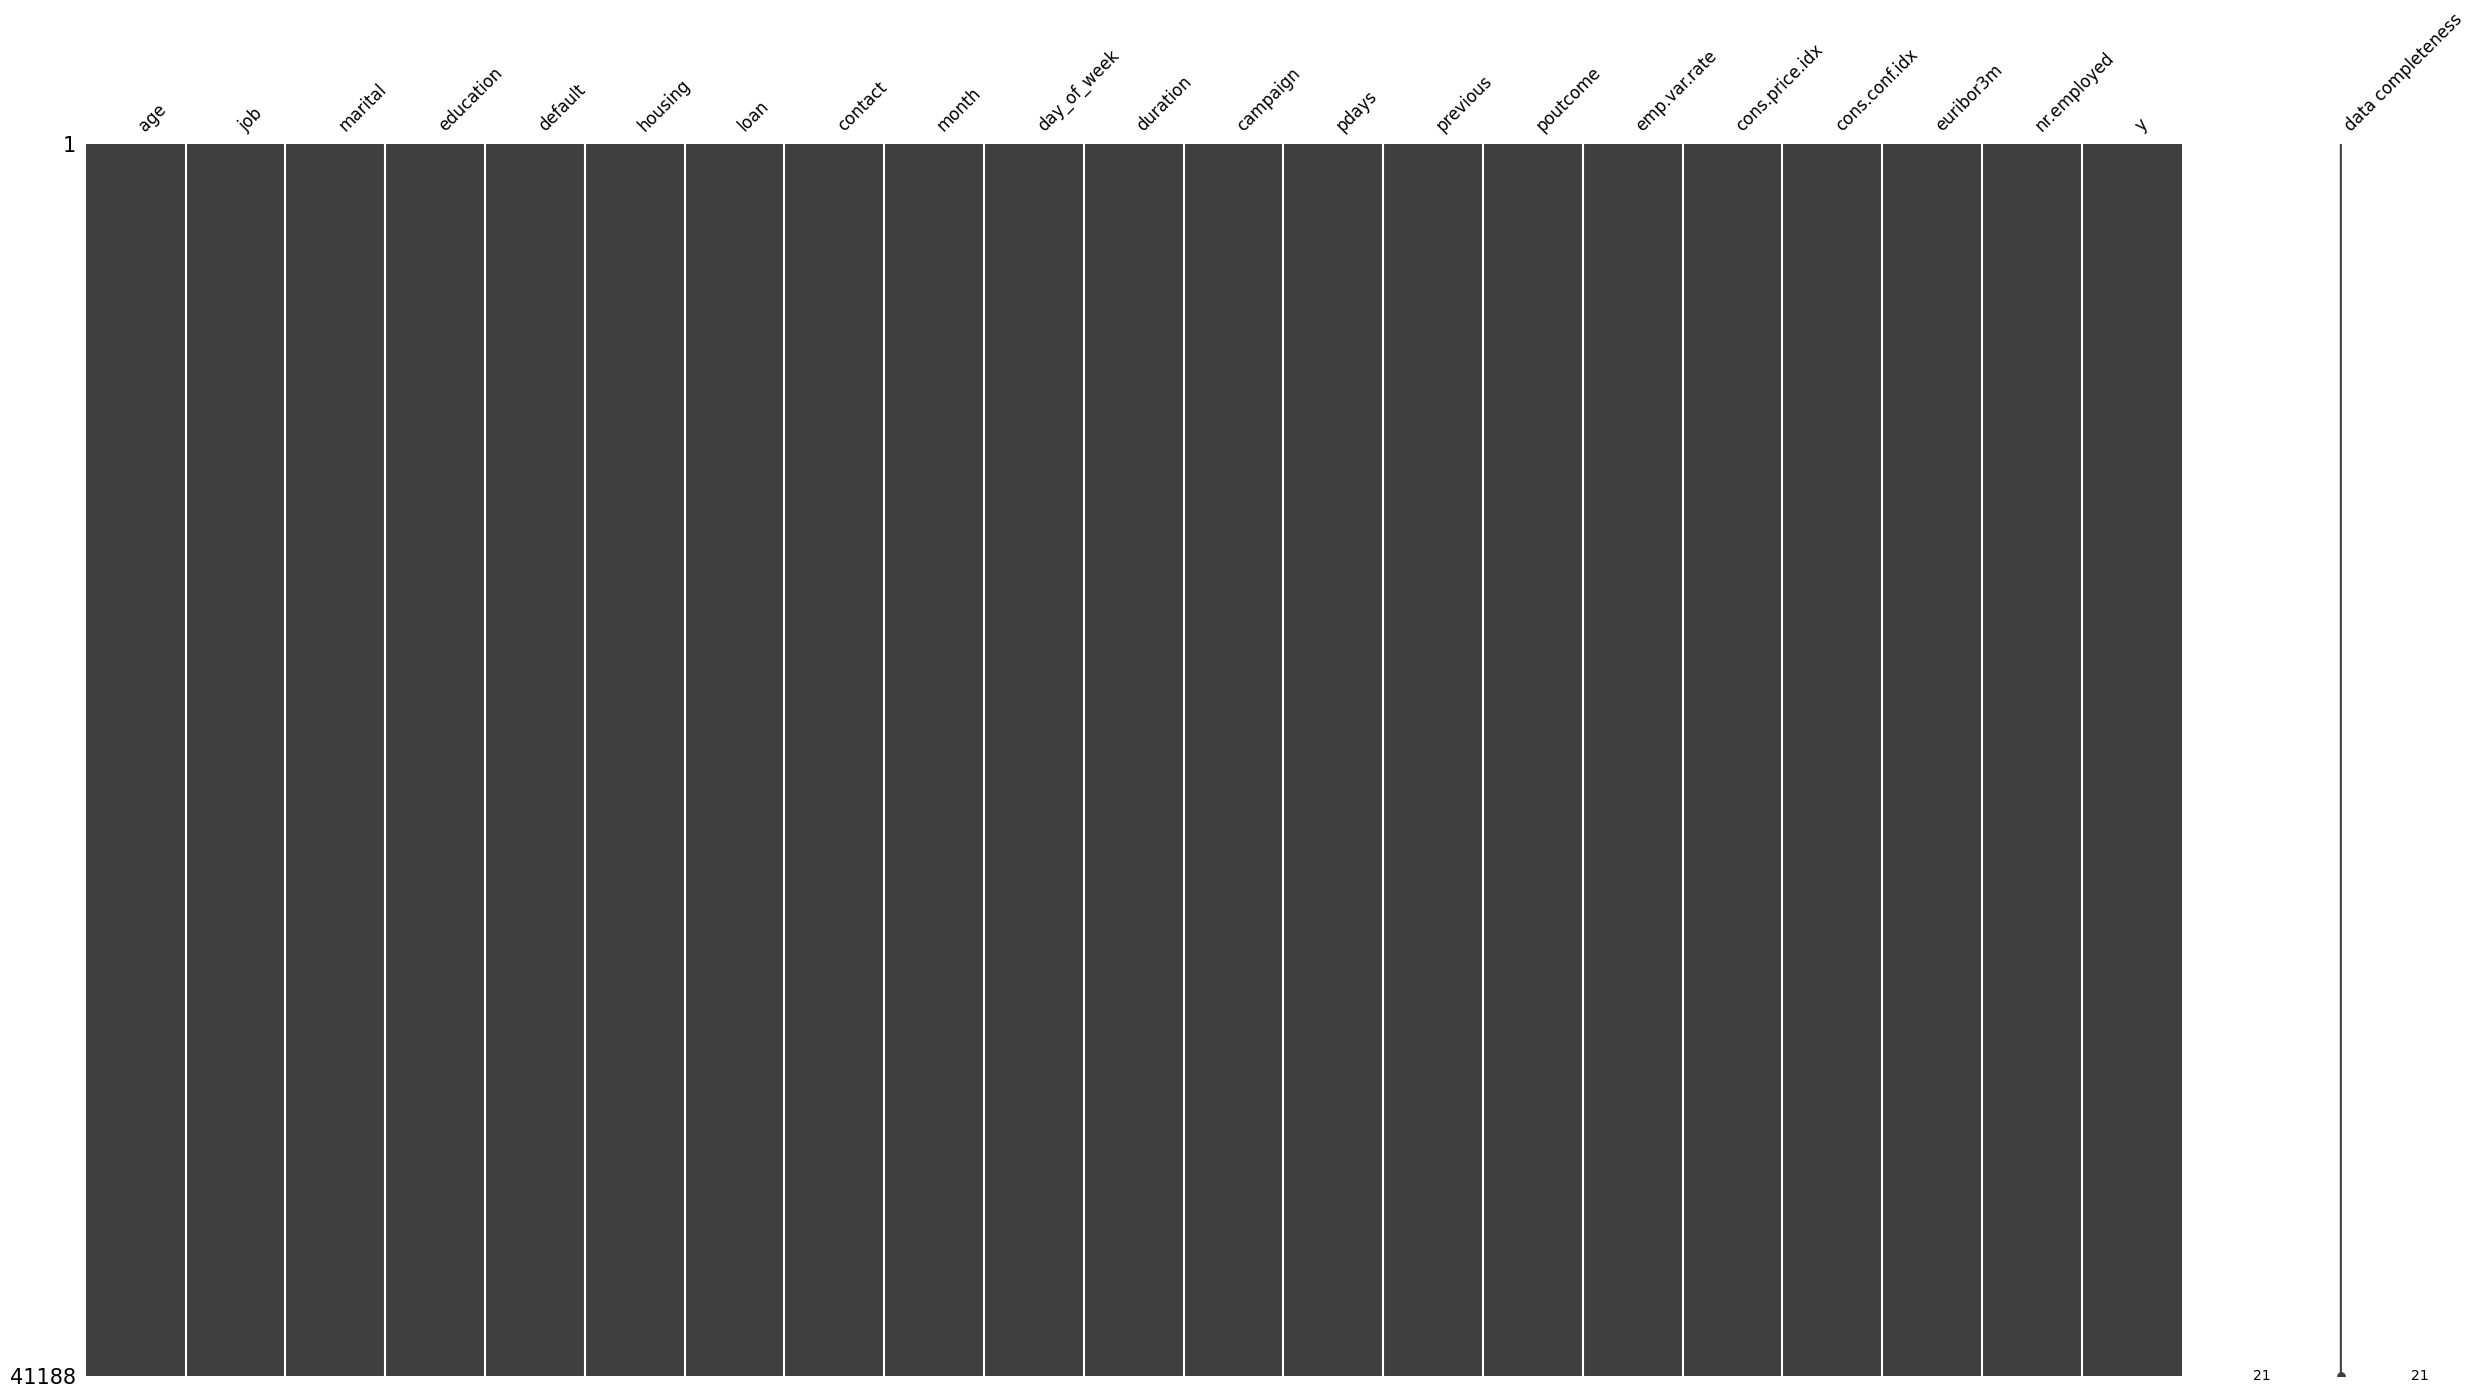

In [14]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Checking the data distribution of each Continuous variable</p></h3>  <a class="anchor" id="sec2.2"></a>

#### Skewed Distribution

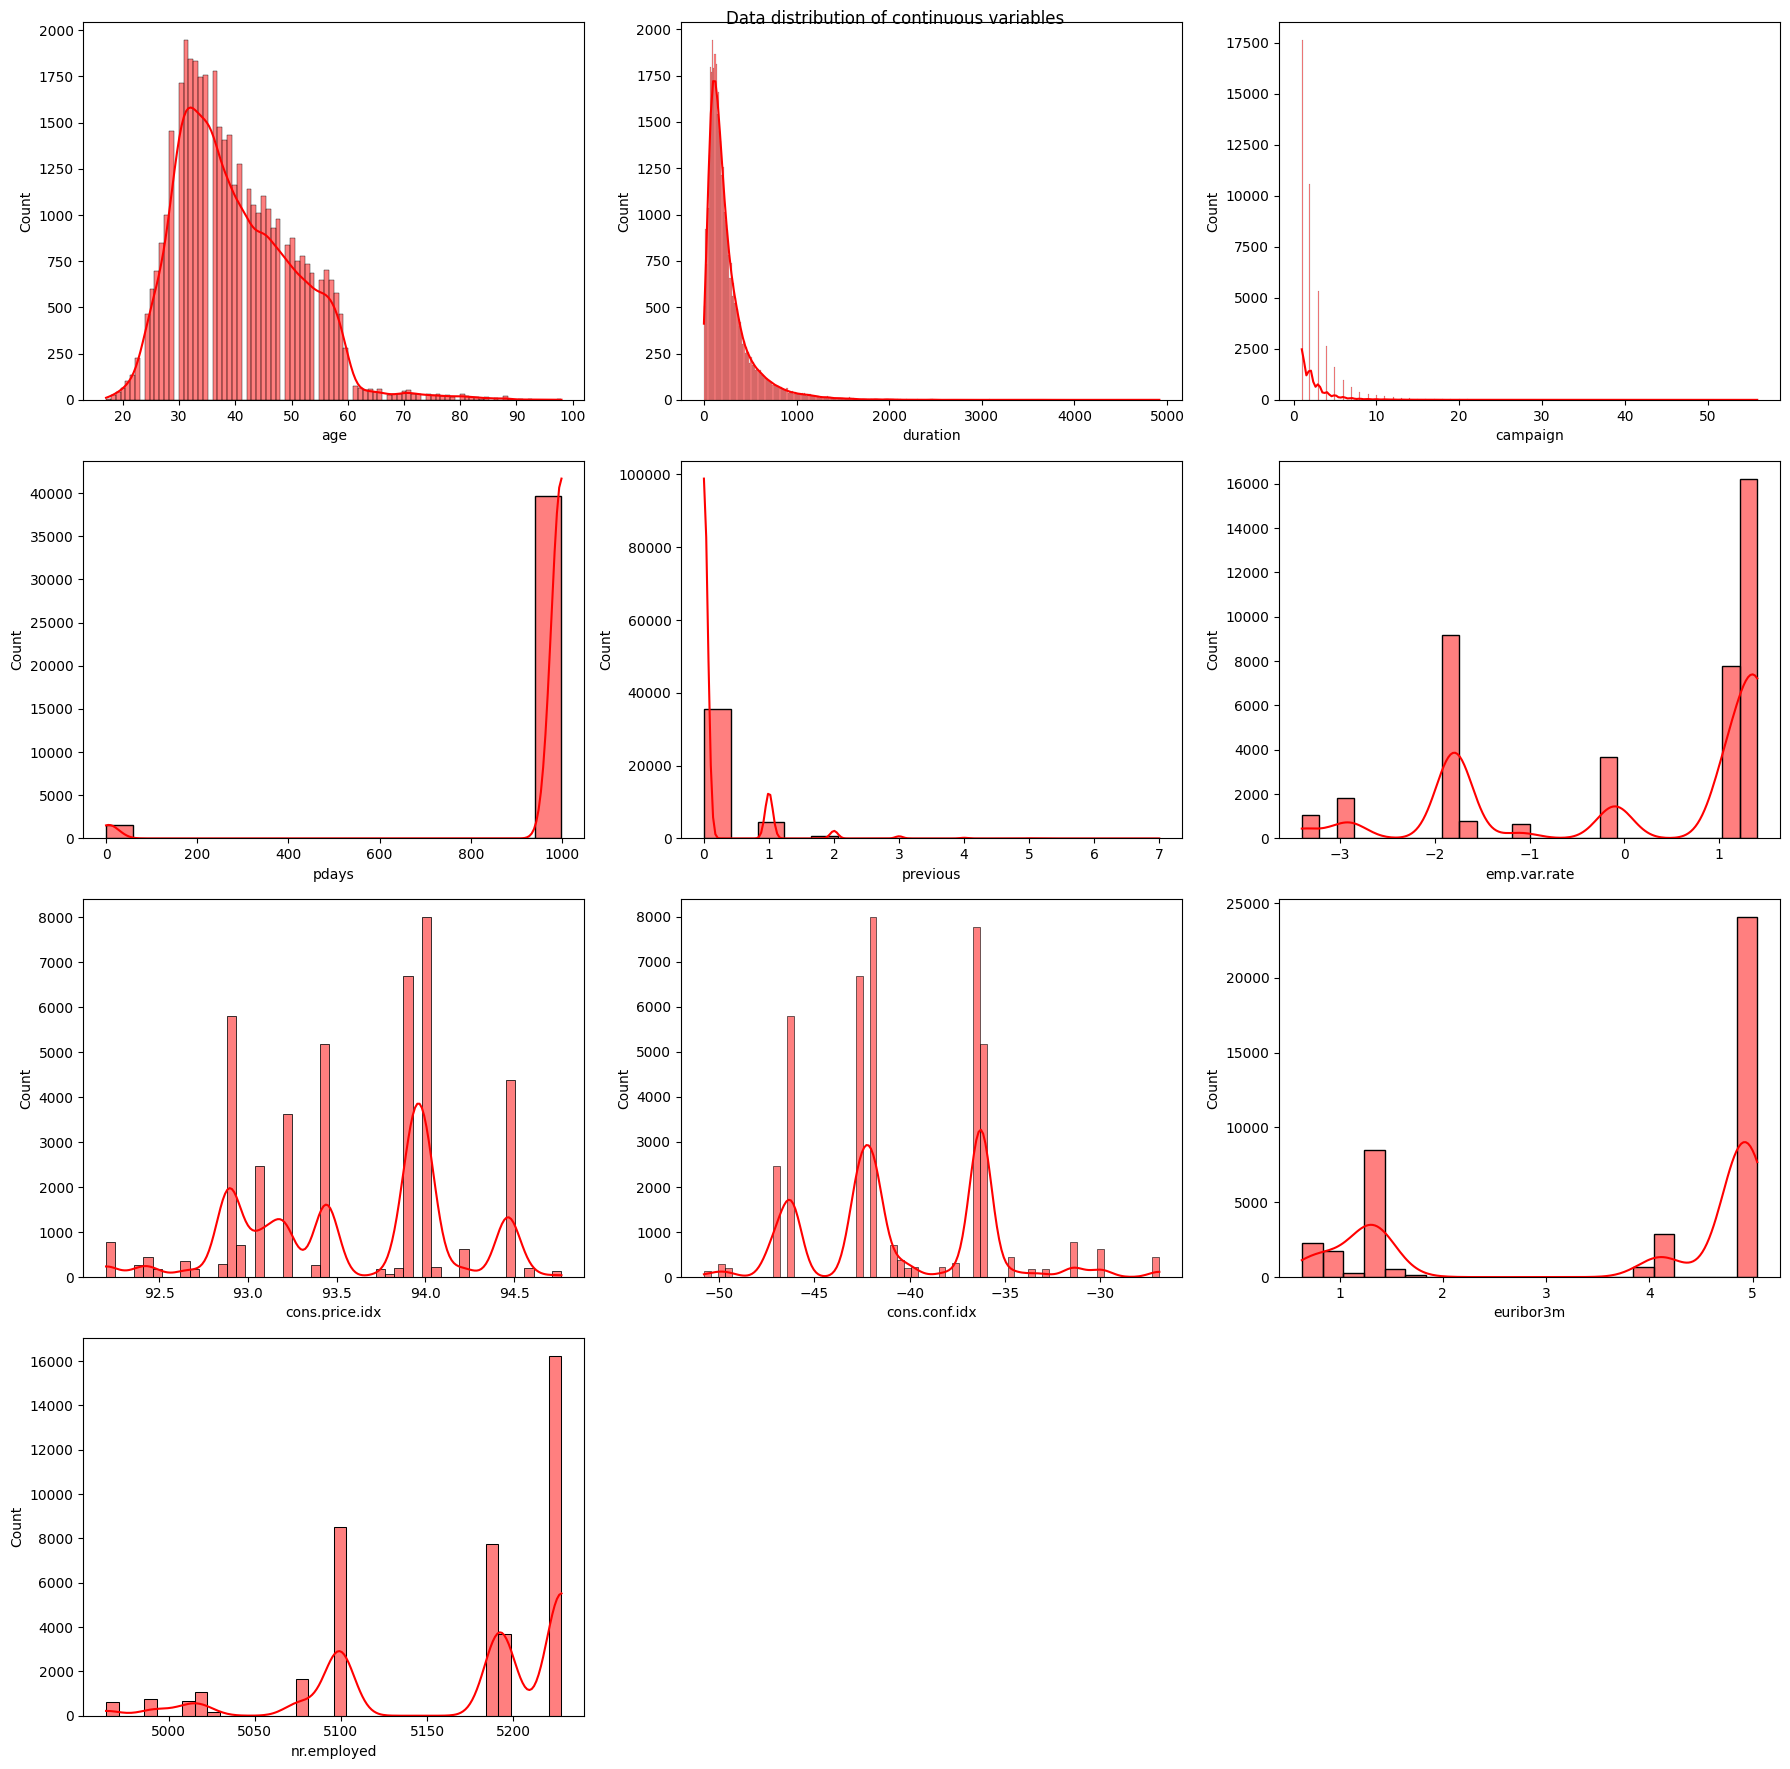

In [16]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

#### Box Plot

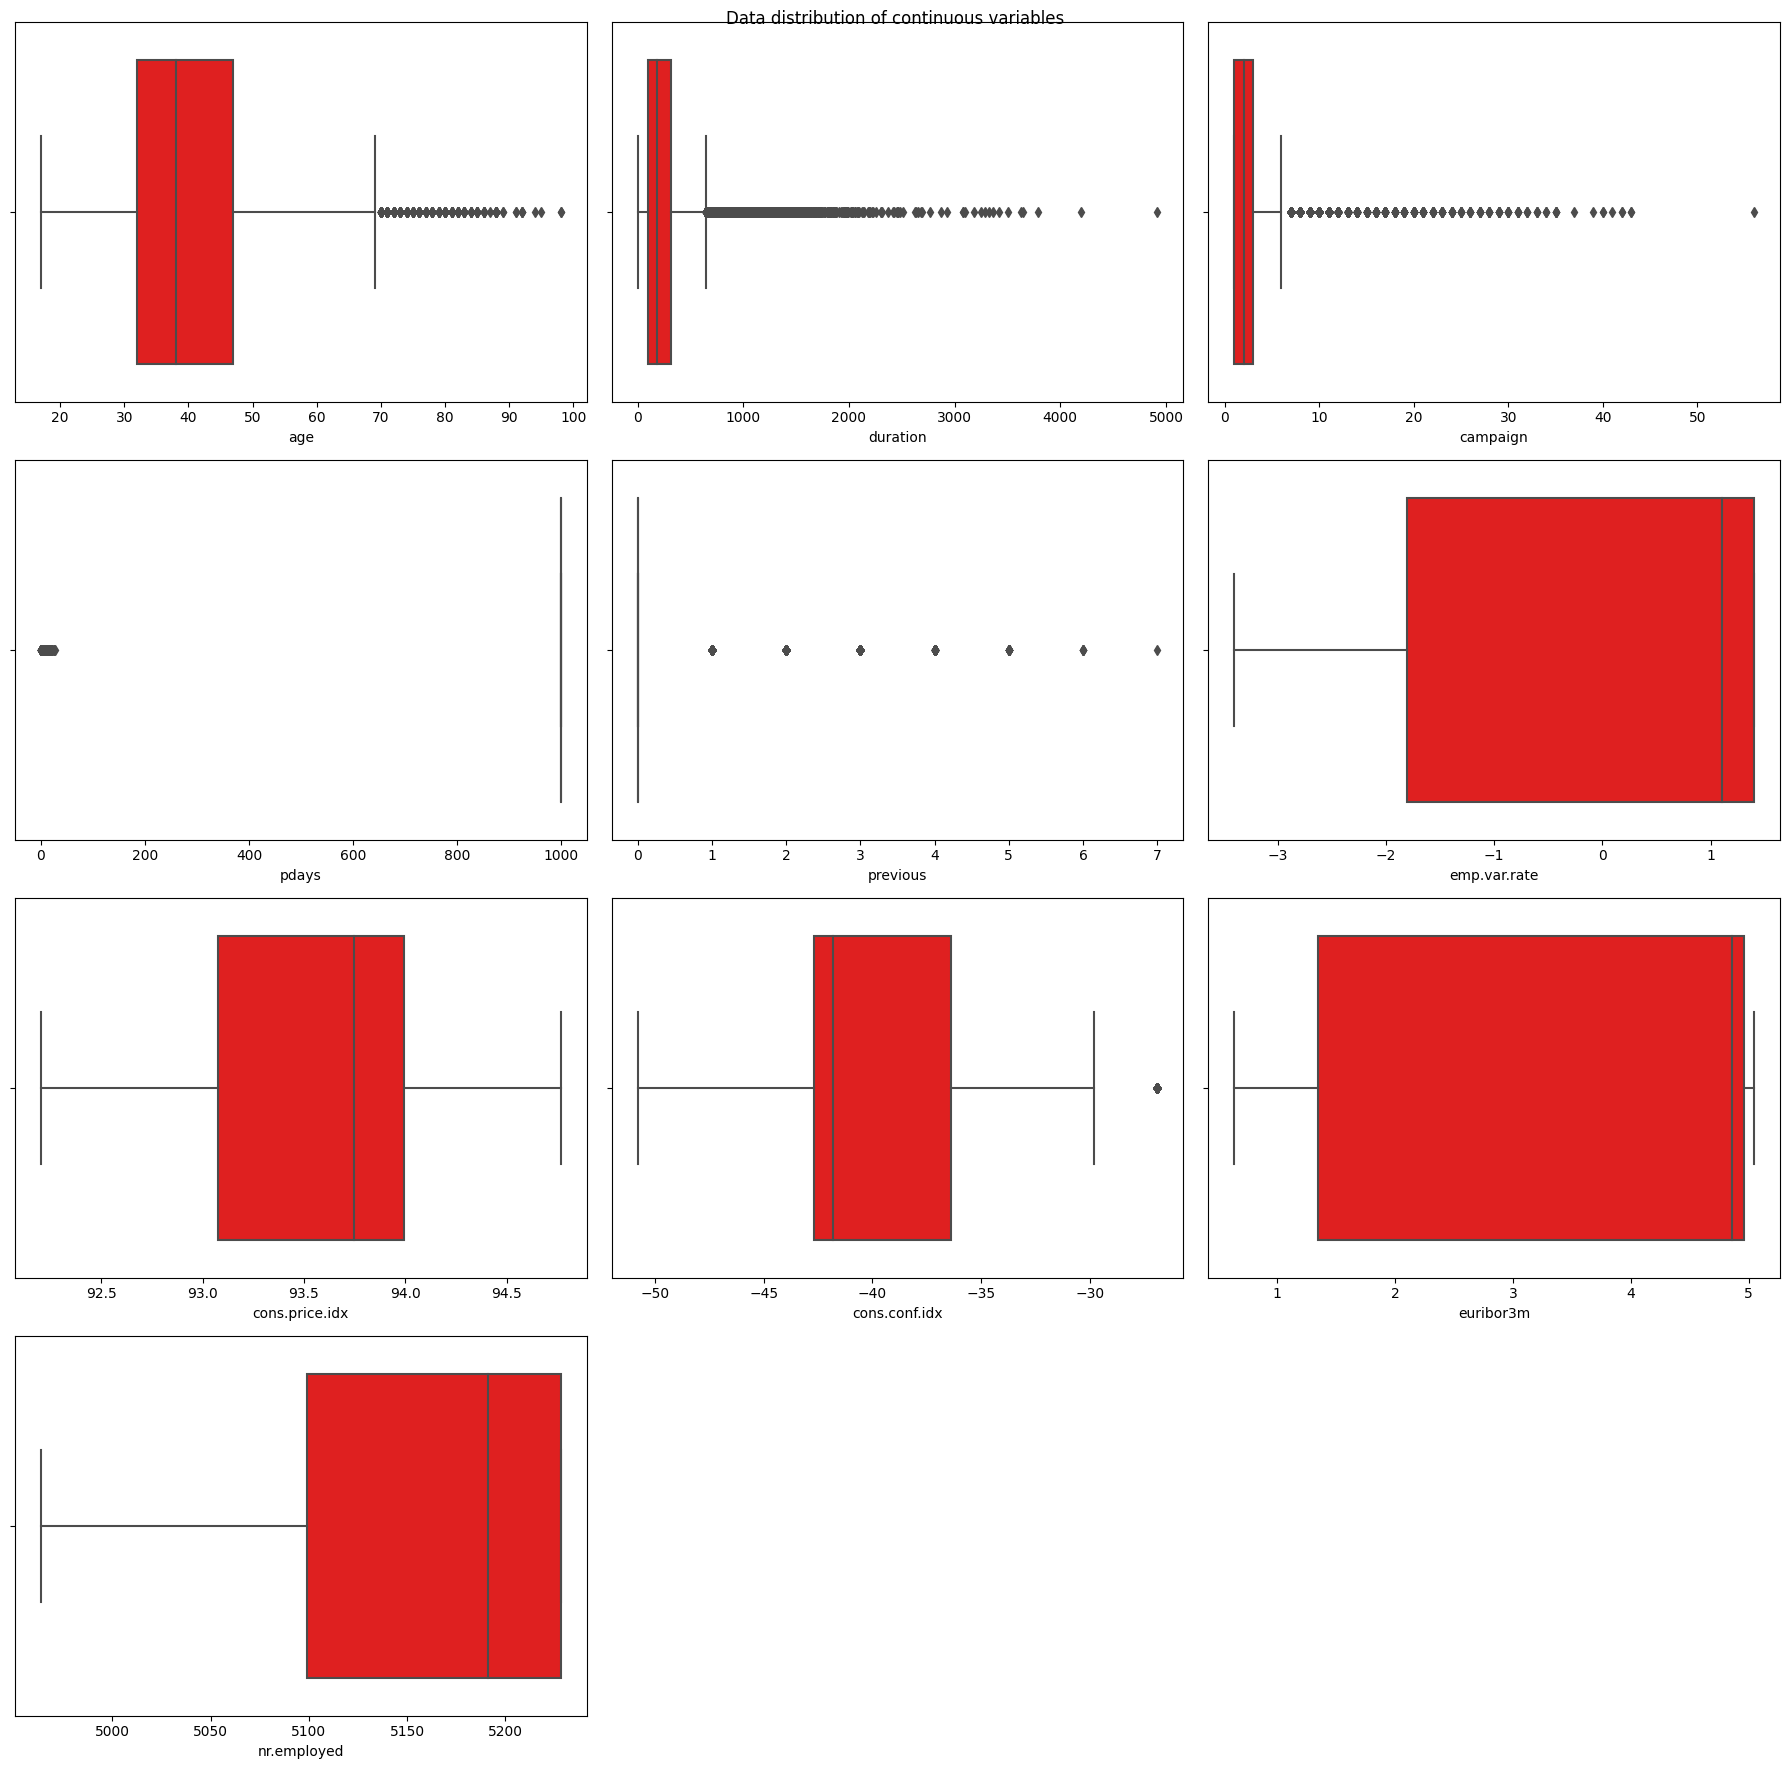

In [17]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='red')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

#### Heatmap

The heatmap plot below, we can interpret which variable is how much correlated to other variable and we can see that **pdays** and **previous** are correlated to each other to avoid multicollinearity we need to remove one variable.

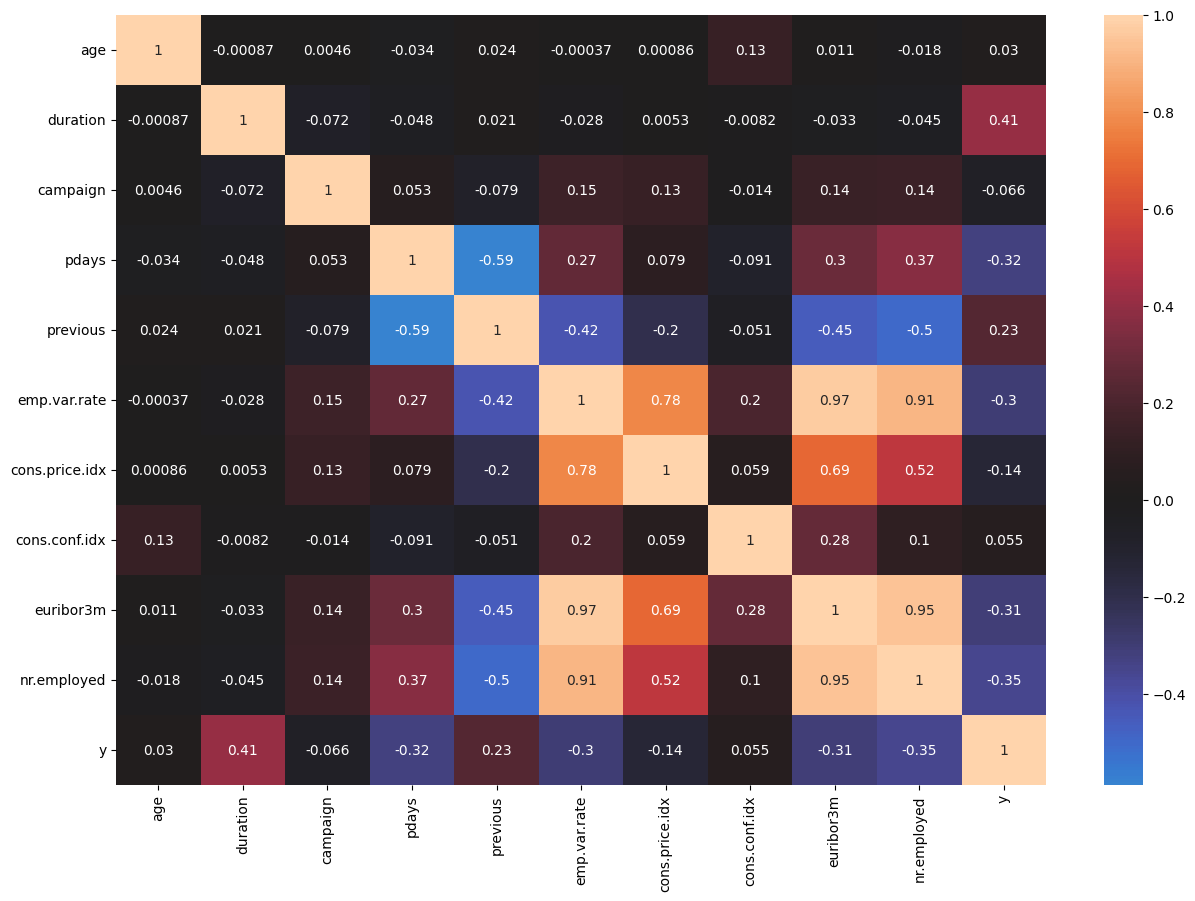

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=True,center = 0)
plt.show()

In [19]:
del df['pdays']#removing pdays to avoid multicollinearity

<Axes: xlabel='education', ylabel='count'>

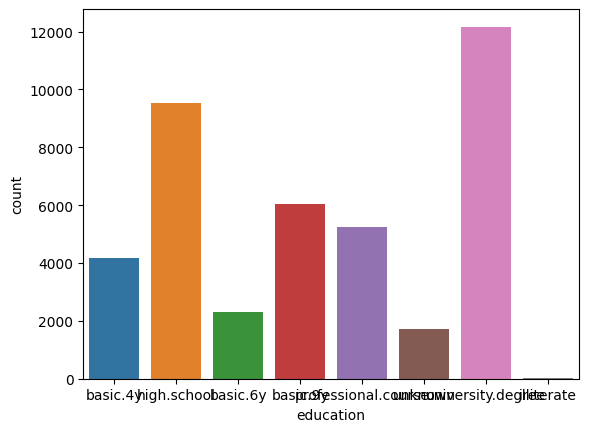

In [20]:
sns.countplot(x='education',data=df)

<Axes: xlabel='contact', ylabel='count'>

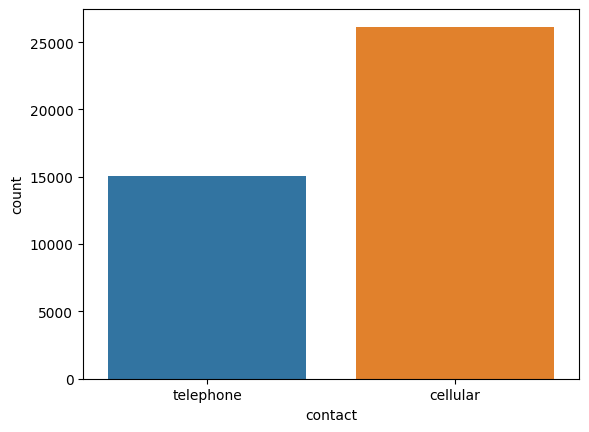

In [21]:
sns.countplot(x='contact',data=df)

<Axes: xlabel='loan', ylabel='count'>

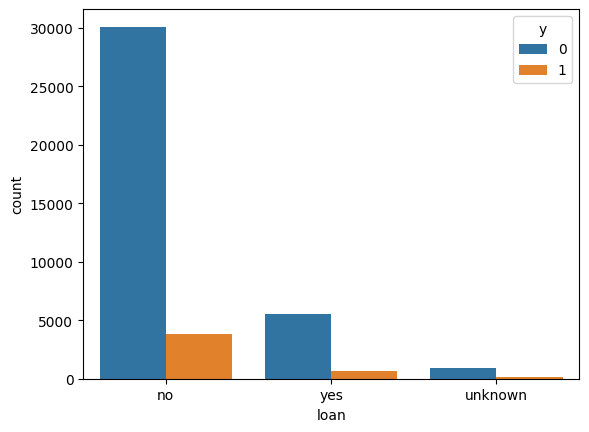

In [22]:
sns.countplot(x='loan',data=df,hue='y')

<Axes: xlabel='default', ylabel='count'>

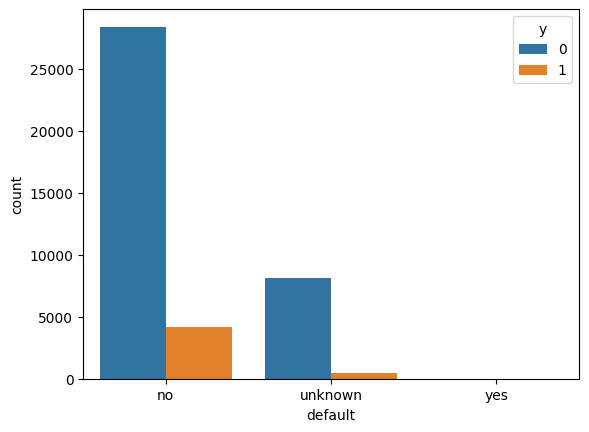

In [23]:
sns.countplot(x='default',data=df,hue='y')

<Axes: xlabel='housing', ylabel='count'>

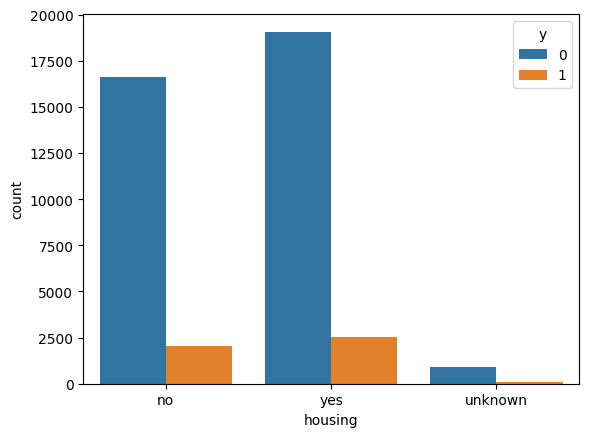

In [24]:
sns.countplot(x='housing',data=df,hue='y')

#### Bar Plot

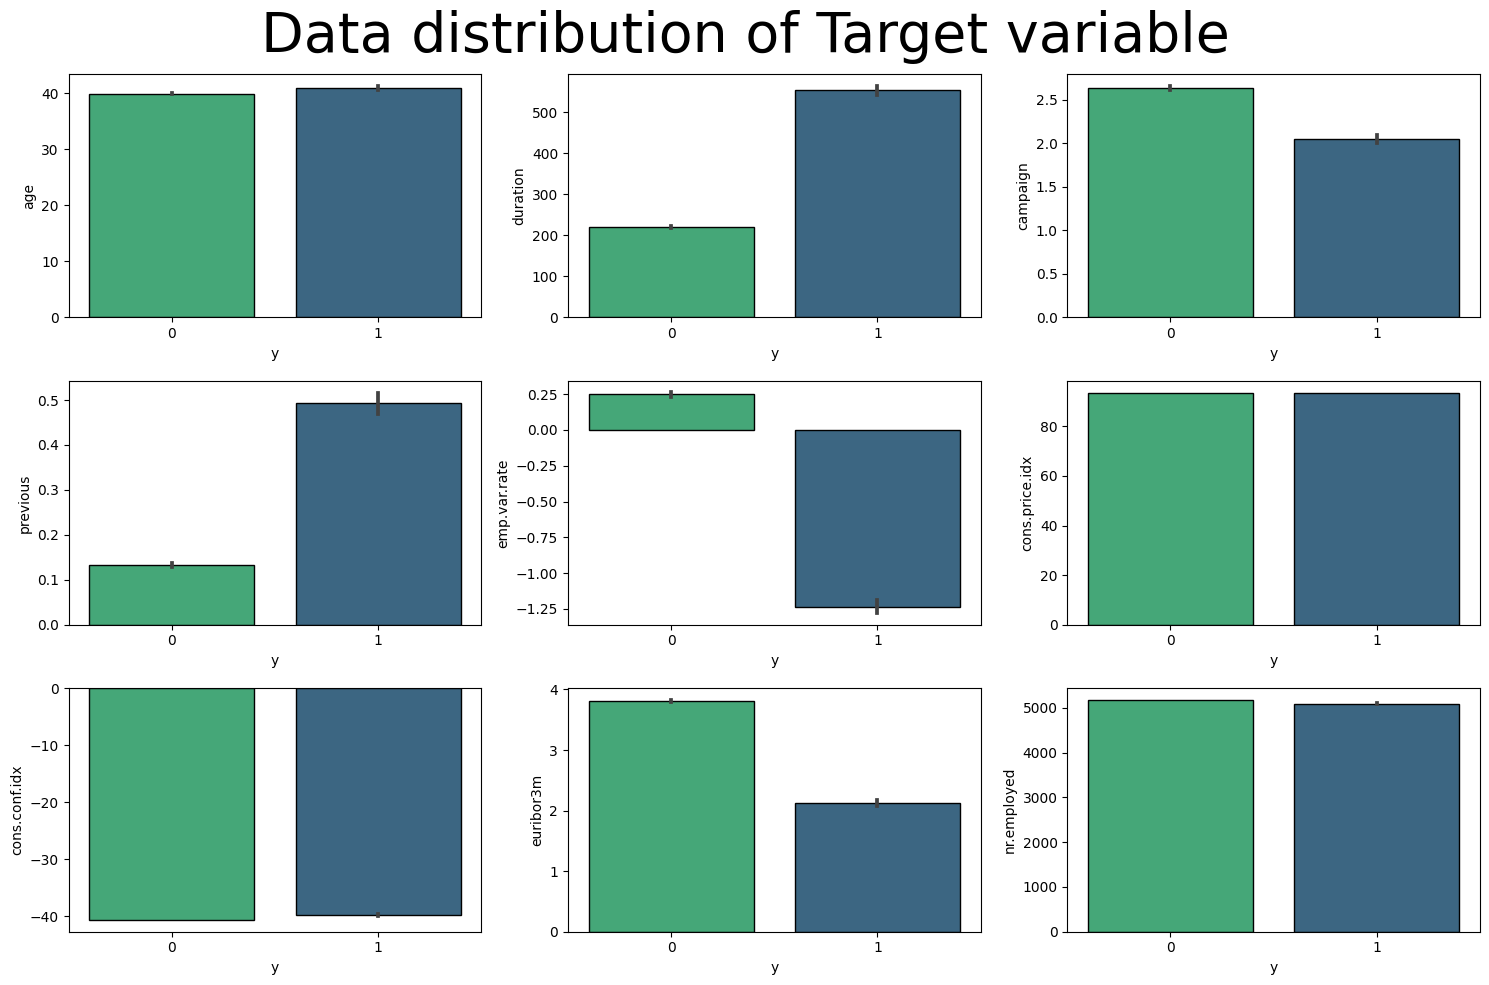

In [25]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.drop(['y'],axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.barplot(data=df,x='y', y=col, ax=ax,edgecolor="black",palette='viridis_r')
font= {'fontsize':25,'color': 'grey'}
plt.suptitle('Data distribution of Target variable',fontsize=40)
plt.tight_layout()

#### Analysing the Target Variable

Pie chart below tells us that both classes are not equal.This is a case of **Unbalanced data** so we will use SMOTE technique to oversample the data.

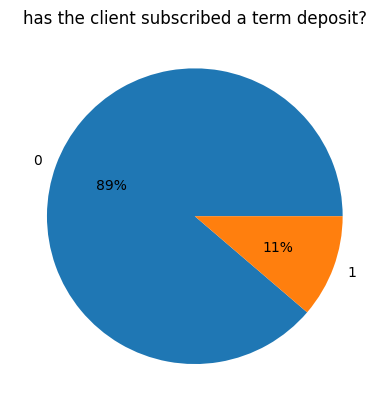

In [26]:
#1=Yes and 0=No
target_var=pd.crosstab(index=df['y'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('has the client subscribed a term deposit?')
plt.show()

<h3><p style="color:white;font-size:150%;background-color:slateblue;padding:12px;border-radius: 8px">Count plot shows that the target class is imbalanced </p></h3><a class="anchor" id="sec2.9"></a>

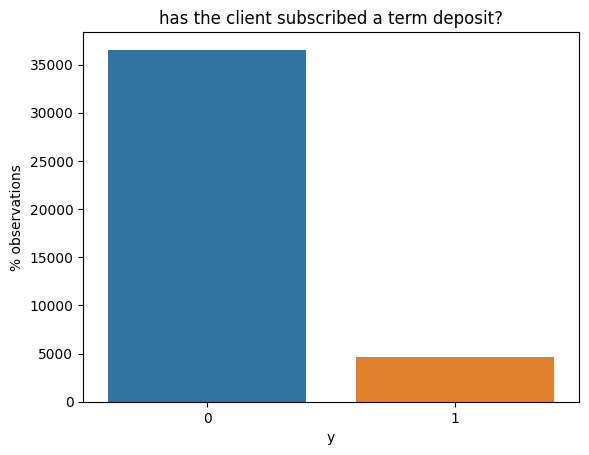

In [27]:
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('has the client subscribed a term deposit?')
plt.show()

In [28]:
df1=pd.get_dummies(df,drop_first=True)#applying One-Hot Encoding

In [29]:
X=df1.drop(['y'],axis=1)
y=df1['y']

In [30]:
X.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,0,1.10,93.99,-36.40,4.86,"5,191.00",0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,0,1.10,93.99,-36.40,4.86,"5,191.00",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,0,1.10,93.99,-36.40,4.86,"5,191.00",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,0,1.10,93.99,-36.40,4.86,"5,191.00",0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,0,1.10,93.99,-36.40,4.86,"5,191.00",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


#### Feature Selection

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

#### SMOTE (Synthetic Minority Oversampling Technique)

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [36]:
X_train,y_train=sm.fit_resample(X_train,y_train)

#### Count plot after applying SMOTE

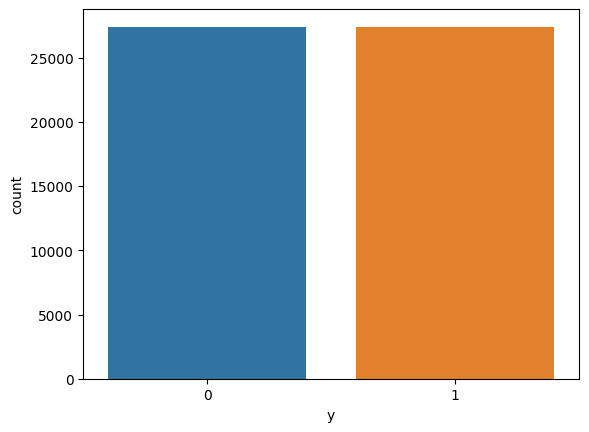

In [38]:
sns.countplot(x=y_train)
plt.show()

#### Here we are going to use **Standardization**.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling

In [41]:
#importing different classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [42]:
#creating dictionary for storing different models accuracy
model_comparison={}

#### Logistic Regression

In [43]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Logistic Regression']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 85.29%
Model F1-Score : 83.37%
Cross Val Accuracy: 85.50 %
Cross Val Standard Deviation: 0.56 %
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      8012
           1       0.83      0.42      0.56      2285

    accuracy                           0.85     10297
   macro avg       0.84      0.70      0.74     10297
weighted avg       0.85      0.85      0.83     10297



#### Decision Tree

In [44]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 87.75%
Model F1-Score : 87.41%
Cross Val Accuracy: 90.97 %
Cross Val Standard Deviation: 14.32 %
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8976
           1       0.53      0.46      0.49      1321

    accuracy                           0.88     10297
   macro avg       0.72      0.70      0.71     10297
weighted avg       0.87      0.88      0.87     10297



#### KNN

In [45]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 87.75%
Model F1-Score : 87.41%
Cross Val Accuracy: 91.94 %
Cross Val Standard Deviation: 6.37 %
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8976
           1       0.53      0.46      0.49      1321

    accuracy                           0.88     10297
   macro avg       0.72      0.70      0.71     10297
weighted avg       0.87      0.88      0.87     10297



#### Naive Bayes

In [46]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 76.83%
Model F1-Score : 72.97%
Cross Val Accuracy: 78.67 %
Cross Val Standard Deviation: 0.17 %
              precision    recall  f1-score   support

           0       0.77      0.97      0.85      7255
           1       0.78      0.30      0.43      3042

    accuracy                           0.77     10297
   macro avg       0.77      0.63      0.64     10297
weighted avg       0.77      0.77      0.73     10297



#### Random Forest

In [47]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 90.49%
Model F1-Score : 90.56%
Cross Val Accuracy: 93.55 %
Cross Val Standard Deviation: 6.03 %
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      9172
           1       0.56      0.58      0.57      1125

    accuracy                           0.90     10297
   macro avg       0.76      0.76      0.76     10297
weighted avg       0.91      0.90      0.91     10297



#### XGBoost

In [48]:
classifier = XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 91.24%
Model F1-Score : 91.32%
Cross Val Accuracy: 91.81 %
Cross Val Standard Deviation: 10.53 %
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9187
           1       0.59      0.62      0.60      1110

    accuracy                           0.91     10297
   macro avg       0.77      0.78      0.78     10297
weighted avg       0.91      0.91      0.91     10297



## Model Comparison

In [50]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,91.24%,91.32%,91.81%,10.53%
Random Forest,90.49%,90.56%,93.55%,6.03%
Decision Tree,87.75%,87.41%,90.97%,14.32%
KNN,87.75%,87.41%,91.94%,6.37%
Logistic Regression,85.29%,83.37%,85.50%,0.56%
Naive Bayes,76.83%,72.97%,78.67%,0.17%


#### Maximum Accuracies in each Column



In [51]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,91.24%,91.32%,91.81%,10.53%
Random Forest,90.49%,90.56%,93.55%,6.03%
Decision Tree,87.75%,87.41%,90.97%,14.32%
KNN,87.75%,87.41%,91.94%,6.37%
Logistic Regression,85.29%,83.37%,85.50%,0.56%
Naive Bayes,76.83%,72.97%,78.67%,0.17%


#### Minimum Accuracies in each Column

In [52]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,91.24%,91.32%,91.81%,10.53%
Random Forest,90.49%,90.56%,93.55%,6.03%
Decision Tree,87.75%,87.41%,90.97%,14.32%
KNN,87.75%,87.41%,91.94%,6.37%
Logistic Regression,85.29%,83.37%,85.50%,0.56%
Naive Bayes,76.83%,72.97%,78.67%,0.17%


## Conclusion

#### In this case both XGBoost and Random Forest are equally good performing models for the prediction of subscription of the bank term deposit by a client.